In [0]:
!pip install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html
!pip install kmeans-pytorch

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1MB 25kB/s 
     |████████████████████████████████| 8.8MB 39.1MB/s 
  Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0
  Found existing installation: torchvision 0.5.0
    Uninstalling torchvision-0.5.0:
      Successfully uninstalled torchvision-0.5.0


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from kmeans_pytorch import kmeans, kmeans_predict

In [179]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from google.colab import drive
drive.mount('/content/gdrive')


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
#https://drive.google.com/open?id=1VnR_sqIGFKsDwdixKoBWzE5Z66zgy-nv
#https://drive.google.com/open?id=1l-y3aBjj8rEeZldgJU_-18qE5gwAWLld

file_id = '1l-y3aBjj8rEeZldgJU_-18qE5gwAWLld'
downloaded = drive.CreateFile({'id':'1l-y3aBjj8rEeZldgJU_-18qE5gwAWLld'}) # replace the id with id of file you want to access
downloaded.GetContentFile('movies.csv')  

df2 = pd.read_csv('movies.csv')
df2

movieId  ... Unnamed: 12
0           1  ...         NaN
1           2  ...         NaN
2           3  ...         NaN
3           4  ...         NaN
4           5  ...         NaN
...       ...  ...         ...
9120   162672  ...         NaN
9121   163056  ...         NaN
9122   163949  ...         NaN
9123   164977  ...         NaN
9124   164979  ...         NaN

[9125 rows x 13 columns]

In [222]:
#https://drive.google.com/open?id=1soaRlo0CQlv6RVWUog3WLKwMDwcLlLhT
#https://drive.google.com/open?id=1soaRlo0CQlv6RVWUog3WLKwMDwcLlLhT
file_id = '1soaRlo0CQlv6RVWUog3WLKwMDwcLlLhT'
downloaded = drive.CreateFile({'id':'1soaRlo0CQlv6RVWUog3WLKwMDwcLlLhT'}) # replace the id with id of file you want to access
downloaded.GetContentFile('ratings.csv')  

df1 = pd.read_csv('ratings.csv')
df1

userId  movieId  rating   timestamp
0            1       31     2.5  1260759144
1            1     1029     3.0  1260759179
2            1     1061     3.0  1260759182
3            1     1129     2.0  1260759185
4            1     1172     4.0  1260759205
...        ...      ...     ...         ...
99999      671     6268     2.5  1065579370
100000     671     6269     4.0  1065149201
100001     671     6365     4.0  1070940363
100002     671     6385     2.5  1070979663
100003     671     6565     3.5  1074784724

[100004 rows x 4 columns]

In [215]:
##https://drive.google.com/open?id=1U1hAU3ZoD3-TDon4Rf5N8Ukr0MtlBneZ

file_id = '1U1hAU3ZoD3-TDon4Rf5N8Ukr0MtlBneZ'
downloaded = drive.CreateFile({'id':'1U1hAU3ZoD3-TDon4Rf5N8Ukr0MtlBneZ'}) # replace the id with id of file you want to access
downloaded.GetContentFile('AllUserRecommendation.csv')  

allrecs = pd.read_csv('AllUserRecommendation.csv')
allrecs

userId  recommendedMovie  recommendedMovieRatng
0         1               527                    4.5
1         2               908                    2.8
2         3               780                    4.2
3         4               527                    2.9
4         5               778                    4.3
..      ...               ...                    ...
666     667                50                    3.3
667     668               356                    2.6
668     669              2762                    3.7
669     670             58559                    2.9
670     671               135                    2.0

[671 rows x 3 columns]

In [216]:
movie_data = pd.merge(df1, df2, on='movieId')
movie_data

KeyError: ignored

In [217]:
rm = pd.merge(allrecs, movie_data, left_on='userId', right_on='userId')

rm

userId  recommendedMovie  ...  Unnamed: 11  Unnamed: 12
0            1               527  ...          NaN          NaN
1            1               527  ...          NaN          NaN
2            1               527  ...          NaN          NaN
3            1               527  ...          NaN          NaN
4            1               527  ...          NaN          NaN
...        ...               ...  ...          ...          ...
99999      671               135  ...          NaN          NaN
100000     671               135  ...          NaN          NaN
100001     671               135  ...          NaN          NaN
100002     671               135  ...          NaN          NaN
100003     671               135  ...          NaN          NaN

[100004 rows x 18 columns]

In [219]:
rm = rm[pd.notnull(rm['recommendedMovieRatng'])]
rm

userId  recommendedMovie  ...  Unnamed: 11  Unnamed: 12
0            1               527  ...          NaN          NaN
1            1               527  ...          NaN          NaN
2            1               527  ...          NaN          NaN
3            1               527  ...          NaN          NaN
4            1               527  ...          NaN          NaN
...        ...               ...  ...          ...          ...
99999      671               135  ...          NaN          NaN
100000     671               135  ...          NaN          NaN
100001     671               135  ...          NaN          NaN
100002     671               135  ...          NaN          NaN
100003     671               135  ...          NaN          NaN

[100004 rows x 18 columns]

In [220]:
movies = rm.pivot(index='userId', columns='movieId', values='rating')
movies

movieId  1       2       3       4       ...  162376  162542  162672  163949
userId                                   ...                                
1           NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
2           NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
3           NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
4           NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
5           NaN     NaN     4.0     NaN  ...     NaN     NaN     NaN     NaN
...         ...     ...     ...     ...  ...     ...     ...     ...     ...
667         NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
668         NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
669         NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
670         4.0     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
671         5.0     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN

[671 rows x 9066 columns]

In [223]:
ratings = pd.DataFrame(df1.groupby('movieId')['rating'].mean())
ratings

rating
movieId          
1        3.872470
2        3.401869
3        3.161017
4        2.384615
5        3.267857
...           ...
161944   5.000000
162376   4.500000
162542   5.000000
162672   3.000000
163949   5.000000

[9066 rows x 1 columns]

In [224]:
ratings['number_of_ratings'] = df1.groupby('movieId')['rating'].count()
ratings

rating  number_of_ratings
movieId                             
1        3.872470                247
2        3.401869                107
3        3.161017                 59
4        2.384615                 13
5        3.267857                 56
...           ...                ...
161944   5.000000                  1
162376   4.500000                  1
162542   5.000000                  1
162672   3.000000                  1
163949   5.000000                  1

[9066 rows x 2 columns]

In [225]:
user_ratings=df3.fillna(0)
user_ratings

movieId  1       2       3       4       ...  162376  162542  162672  163949
userId                                   ...                                
1           0.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
2           0.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
3           0.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
4           0.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
5           0.0     0.0     4.0     0.0  ...     0.0     0.0     0.0     0.0
...         ...     ...     ...     ...  ...     ...     ...     ...     ...
667         0.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
668         0.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
669         0.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
670         4.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
671         5.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0

[671 rows x 9066 columns]

In [47]:
non_zero_columns= user_ratings.astype(bool).sum(axis=1)
non_zero_columns

userId
1       20
2       76
3       51
4      204
5      100
      ... 
667     68
668     20
669     37
670     31
671    115
Length: 671, dtype: int64

In [0]:
#df1.info()

In [56]:
#u_rate = pd.DataFrame
sum_rate= user_ratings.sum(axis=1)
sum_rate

userId
1       51.0
2      265.0
3      182.0
4      887.0
5      391.0
       ...  
667    248.0
668     75.0
669    124.0
670    118.0
671    450.5
Length: 671, dtype: float64

In [66]:
average_value= sum_rate.divide(non_zero_columns, fill_value=0)
average_value

userId
1      2.550000
2      3.486842
3      3.568627
4      4.348039
5      3.910000
         ...   
667    3.647059
668    3.750000
669    3.351351
670    3.806452
671    3.917391
Length: 671, dtype: float64

In [81]:
one_rate=user_ratings[1]
print(one_rate)

userId
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
667    0.0
668    0.0
669    0.0
670    4.0
671    5.0
Name: 1, Length: 671, dtype: float64


In [87]:
#For the first movie, we find the movies that are most similar to it

movies_like_one = user_ratings.corrwith(one_rate)

one_corr = pd.DataFrame(movies_like_one, columns=['CORR'])
one_corr.dropna(inplace=True)
one_corr


CORR
movieId          
1        1.000000
2        0.223742
3        0.183266
4        0.071055
5        0.105076
...           ...
161944   0.070607
162376   0.070607
162542  -0.028157
162672  -0.028157
163949   0.040978

[9066 rows x 1 columns]

In [183]:
allrecs['movieId']= allrecs['recommendedMovie']
allrecs

userId  recommendedMovie  recommendedMovieRatng  movieId
0         1               527                    4.5      527
1         2               908                    2.8      908
2         3               780                    4.2      780
3         4               527                    2.9      527
4         5               778                    4.3      778
..      ...               ...                    ...      ...
666     667                50                    3.3       50
667     668               356                    2.6      356
668     669              2762                    3.7     2762
669     670             58559                    2.9    58559
670     671               135                    2.0      135

[671 rows x 4 columns]

In [188]:
reduced_matrix = pd.merge(allrecs, one_corr, left_on='movieId', right_on='movieId')
reduced_matrix = reduced_matrix.drop(labels='recommendedMovieRatng', axis=1)
reduced_matrix = reduced_matrix.drop(labels='userId', axis=1)
reduced_matrix

recommendedMovie  movieId      CORR
0                 527      527  0.144849
1                 527      527  0.144849
2                 527      527  0.144849
3                 527      527  0.144849
4                 527      527  0.144849
..                ...      ...       ...
666               588      588  0.280637
667              1343     1343  0.166768
668              2716     2716  0.190650
669              1059     1059  0.184533
670               805      805  0.192302

[671 rows x 3 columns]

In [189]:
reduced_matrix = reduced_matrix.drop(labels='recommendedMovie', axis=1)
reduced_matrix

movieId      CORR
0        527  0.144849
1        527  0.144849
2        527  0.144849
3        527  0.144849
4        527  0.144849
..       ...       ...
666      588  0.280637
667     1343  0.166768
668     2716  0.190650
669     1059  0.184533
670      805  0.192302

[671 rows x 2 columns]

In [190]:
reduced_matrix=reduced_matrix.drop_duplicates()
reduced_matrix

movieId      CORR
0        527  0.144849
28       908  0.137705
33       780  0.356876
66       778  0.161532
75       457  0.188332
..       ...       ...
666      588  0.280637
667     1343  0.166768
668     2716  0.190650
669     1059  0.184533
670      805  0.192302

[115 rows x 2 columns]

In [191]:
reduced_matrix = reduced_matrix.drop(labels='movieId', axis=1)
reduced_matrix

CORR
0    0.144849
28   0.137705
33   0.356876
66   0.161532
75   0.188332
..        ...
666  0.280637
667  0.166768
668  0.190650
669  0.184533
670  0.192302

[115 rows x 1 columns]

In [193]:
#Similarly, for the entire dataset, we create a correlation matrix for the movies based on user ratings

corrMatrix = user_ratings.corr()
print (corrMatrix)

      CORR
CORR   1.0


In [0]:
import scipy.cluster.hierarchy as spc

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [0]:
#using the correlation values as a similarity measure, we perform hierarchical clustering on the movies dataset

corr = corrMatrix.values

pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')

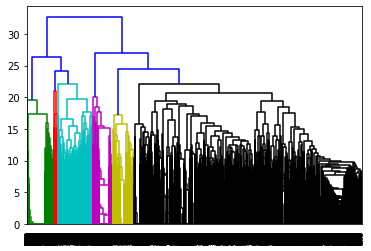

In [130]:

plt.figure()
dn = spc.dendrogram(linkage)

In [0]:
#for i in idx:
#  print (i)

In [160]:
#titles = pd.DataFrame(movie_data.groupby('movieId')['title'])
df = pd.DataFrame(movie_data[['movieId','title']])
df.drop_duplicates()


movieId                  title
0            31       Dangerous Minds 
42         1029                 Dumbo 
84         1061              Sleepers 
117        1129  Escape from New York 
165        1172      Cinema Paradiso  
...         ...                    ...
99999     64997     War of the Worlds 
100000    72380              Box, The 
100001      129        Pie in the Sky 
100002     4736          Summer Catch 
100003     6425         6th Man, The  

[9066 rows x 2 columns]

In [167]:
final= df.sort_values(by=['movieId'])
final2=final.drop_duplicates()
dataset = final2.drop(labels='movieId', axis=1)
dataset

title
31535                                         Toy Story 
41797                                           Jumanji 
24134                                  Grumpier Old Men 
70570                                 Waiting to Exhale 
41924                       Father of the Bride Part II 
...                                                  ...
95264                    The Last Brickmaker in America 
87487                                    Stranger Things
99562                                            Rustom 
99563                                      Mohenjo Daro 
99178  The Beatles: Eight Days a Week - The Touring Y...

[9066 rows x 1 columns]

In [172]:
labelList=np.asarray(dataset)
p= len(labelList)
print(p)

9066


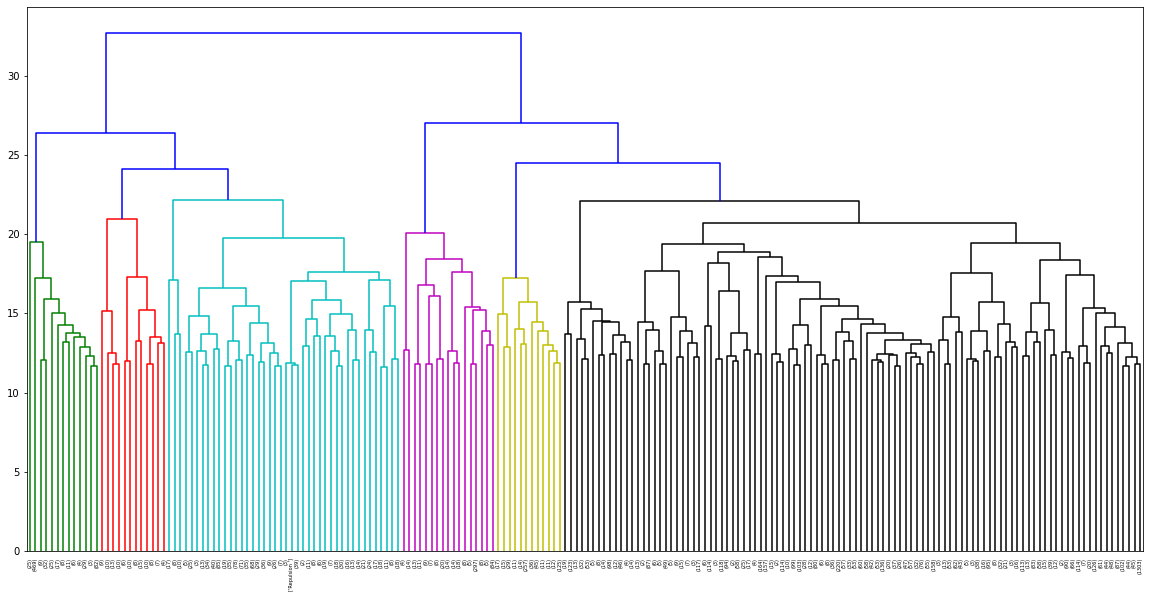

In [227]:
plt.figure(figsize=(20,10))
dn = spc.dendrogram(linkage,p=200,truncate_mode='lastp',labels=labelList)